# ECOMMERCE DATA ANALYSIS

## Objective:
The objective of this data analysis project is to gain insights into the ecommerce order data of a fictional company. We aim to analyze customer information, product details, and order history to derive meaningful conclusions that can aid business decision-making.

In [67]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [68]:
# creating a connection object 
connection = mysql.connector.connect(
    user='root',
    password='101819',
    host='localhost',
    database='ecommerce'
)

In [69]:
# creating a cursor object to execute SQL queries
cursor = connection.cursor()

In [70]:
# executing select query on customer table
cursor.execute('select * from customer')
# storing the data fetched from customer table in a Pandas dataframe
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# executing select query on product table
cursor.execute('select * from product')
# storing the data fetched from product table in a Pandas dataframe
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# executing select query on order_details table
cursor.execute('select * from order_details')
# storing the data fetched from order_details table in a Pandas dataframe
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [71]:
# executing join select query on customer and order_details table
cursor.execute('select * from customer natural join order_details;')
# storing the data fetched in a Pandas dataframe
customer_order = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# executing join select query on product and order_details table
cursor.execute('select * from product natural join order_details;')
# storing the data fetched in a Pandas dataframe
product_order = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# executing join select query on product, customer and order_details table
cursor.execute('select * from product natural join order_details natural join customer;')
# storing the data fetched in a Pandas dataframe
customer_product_order = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [72]:
# closing the connection and cursor
connection.close()
cursor.close()

True

In [73]:
# displaying first 5 records from customer table
customer_data.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [74]:
# displaying first 5 records from product table
product_data.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [75]:
# displaying first 5 records from order_details table
order_data.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [76]:
# displaying last 5 records from customer table
customer_data.tail()

,customer_id,name,city,email,phone_no,address,pin_code
57,C1063,Sophia,Tokyo,sophia@gmail.com,5432123456,ss.tt.road,56789
58,C1064,Ethan,Lake Buena Vista,ethan@example.com,9876123456,2000 E Buena Vista Drive,32830
59,C1065,Oliver,Kanagawa,oliver@mail.com,1234987654,17F Ikenobecho,171
60,C1066,Aria,Sydney,aria@gmail.com,9876543210,uu.vv.road,75001
61,C1067,James,Tokyo,james@gmail.com,1234567890,ww.xx.road,56789


In [77]:
# displaying last 5 records from product table
product_data.tail()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
56,P158,Electric Toothbrush,Appliance,Electronics,4000.0,3000.0,18
57,P159,Car Vacuum,Appliance,Electronics,5000.0,4000.0,20
58,P160,Portable Speaker,Appliance,Electronics,3500.0,3000.0,22
59,P161,Smart Scale,Appliance,Electronics,3000.0,2500.0,20
60,P162,Streaming Device,Electronics,Accessories,5000.0,4000.0,18


In [78]:
# displaying last 5 records from order_details table
order_data.tail()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
71,91,C1063,P159,2.0,8000.0,Online,2024-03-17,Delivered
72,92,C1064,P160,1.0,3000.0,COD,2024-03-18,Cancelled
73,93,C1065,P161,1.0,2500.0,Online,2024-03-19,Delivered
74,94,C1066,P162,1.0,4000.0,COD,2024-03-20,Delivered
75,95,C1067,P154,2.0,4000.0,Online,2024-03-21,Shipped


In [79]:
# shape of customer table
customer_data.shape

(62, 7)

In [80]:
# shape of product table
product_data.shape

(61, 7)

In [81]:
# shape of order_details table
order_data.shape

(76, 8)

In [82]:
# information about the columns of customer table and their corresponding data types
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


In [83]:
# information about the columns of product table and their corresponding data types
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


In [84]:
# information about the columns of order_details table and their corresponding data types
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


In [85]:
# checking for missing values in the customer table dataset
customer_data.isnull().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

In [86]:
# checking for missing values in the product table dataset
product_data.isnull().sum()

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

In [87]:
# checking for missing values in the order_details table dataset
order_data.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

In [88]:
# checking for duplicate values in the customer table dataset
duplicate_rows = customer_data[customer_data.duplicated()].reset_index(drop=True)
print(duplicate_rows)

Empty DataFrame
Columns: [customer_id, name, city, email, phone_no, address, pin_code]
Index: []


In [89]:
# checking for duplicate values in the product table dataset
duplicate_rows = product_data[product_data.duplicated()].reset_index(drop=True)
print(duplicate_rows)

Empty DataFrame
Columns: [product_id, product_name, category, sub_category, original_price, selling_price, stock]
Index: []


In [90]:
# checking for duplicate values in the order_details table dataset
duplicate_rows = order_data[order_data.duplicated()].reset_index(drop=True)
print(duplicate_rows)

Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, total_price, payment_mode, order_date, order_status]
Index: []


In [91]:
# number of unique values in the customer table dataset
customer_data.nunique()

customer_id    62
name           39
city            4
email          52
phone_no       26
address        57
pin_code       21
dtype: int64

In [92]:
# number of unique values in the product table dataset
product_data.nunique()

product_id        61
product_name      43
category           4
sub_category      22
original_price    25
selling_price     26
stock             14
dtype: int64

In [93]:
# number of unique values in the order_details table dataset
order_data.nunique()

order_id        76
customer_id     59
product_id      58
quantity         3
total_price     33
payment_mode     2
order_date      75
order_status     6
dtype: int64

In [94]:
# displaying unique values for each column in customer table dataset
for column in customer_data.columns:
    unique_values = customer_data[column].unique()
    print(f"Unique values in column '{column}':\n{unique_values}\n")

Unique values in column 'customer_id':
['C1001' 'C1002' 'C1003' 'C1004' 'C1005' 'C1006' 'C1007' 'C1008' 'C1009'
 'C1010' 'C1011' 'C1012' 'C1013' 'C1014' 'C1015' 'C1016' 'C1017' 'C1018'
 'C1019' 'C1020' 'C1021' 'C1022' 'C1028' 'C1029' 'C1030' 'C1031' 'C1032'
 'C1033' 'C1034' 'C1035' 'C1036' 'C1037' 'C1038' 'C1039' 'C1040' 'C1041'
 'C1042' 'C1043' 'C1044' 'C1045' 'C1046' 'C1047' 'C1048' 'C1049' 'C1050'
 'C1051' 'C1052' 'C1053' 'C1054' 'C1055' 'C1056' 'C1057' 'C1058' 'C1059'
 'C1060' 'C1061' 'C1062' 'C1063' 'C1064' 'C1065' 'C1066' 'C1067']

Unique values in column 'name':
['Steve' 'john' 'Peter' 'Jackson' 'Jack' 'Wyatt' 'lilly' 'Sophia' 'Oliver'
 'Emma' 'William' 'Ava' 'Mia' 'Ethan' 'Harper' 'Alexander' 'Evelyn' 'Leo'
 'Lucy' 'Henry' 'Olivia' 'Michael' 'Lucas' 'Benjamin' 'Scarlett' 'Liam'
 'Chloe' 'Avery' 'Elijah' 'Aria' 'Elena' 'Carter' 'Sofia' 'James' 'Logan'
 'Luna' 'Aiden' 'Noah' 'Isabella']

Unique values in column 'city':
['Tokyo' 'Sydney' 'Kanagawa' 'Lake Buena Vista']

Unique valu

In [95]:
# displaying unique values for each column in product table dataset
for column in product_data.columns:
    unique_values = product_data[column].unique()
    print(f"Unique values in column '{column}':\n{unique_values}\n")

Unique values in column 'product_id':
['P102' 'P103' 'P104' 'P105' 'P106' 'P107' 'P108' 'P109' 'P110' 'P111'
 'P112' 'P113' 'P114' 'P115' 'P116' 'P117' 'P118' 'P119' 'P120' 'P121'
 'P122' 'P123' 'P124' 'P125' 'P126' 'P127' 'P128' 'P129' 'P130' 'P131'
 'P132' 'P133' 'P134' 'P135' 'P136' 'P137' 'P138' 'P139' 'P140' 'P141'
 'P142' 'P143' 'P144' 'P145' 'P146' 'P147' 'P148' 'P149' 'P150' 'P151'
 'P152' 'P153' 'P154' 'P155' 'P156' 'P157' 'P158' 'P159' 'P160' 'P161'
 'P162']

Unique values in column 'product_name':
['Chair' 'Laptop' 'Smartphone' 'Blender' 'Laptop HP' 'Samsung Galaxy'
 'Desk' 'Tablet' 'Microwave' 'Television' 'chair' 'Dining Table'
 'Refrigerator' 'Sofa' 'Digital Camera' 'Vacuum Cleaner' 'Headphones'
 'Desk Lamp' 'Printer' 'Recliner' 'Microwave Oven' 'Gaming Console'
 'Smartwatch' 'Projector' 'Coffee Maker' 'Sofa Set' 'Water Purifier'
 'Dishwasher' 'Air Purifier' 'Fitness Tracker' 'Smart Speaker' 'Monitor'
 'External Hard Drive' 'Bluetooth Speaker' 'Wireless Earbuds'
 'Portabl

In [96]:
# displaying unique values for each column in order_details table dataset
for column in order_data.columns:
    unique_values = order_data[column].unique()
    print(f"Unique values in column '{column}':\n{unique_values}\n")

Unique values in column 'order_id':
[ 3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95]

Unique values in column 'customer_id':
['C1004' 'C1005' 'C1006' 'C1003' 'C1009' 'C1008' 'C1010' 'C1011' 'C1013'
 'C1014' 'C1015' 'C1016' 'C1017' 'C1019' 'C1020' 'C1021' 'C1022' 'C1018'
 'C1012' 'C1028' 'C1029' 'C1030' 'C1031' 'C1032' 'C1033' 'C1034' 'C1035'
 'C1036' 'C1037' 'C1038' 'C1039' 'C1040' 'C1041' 'C1042' 'C1043' 'C1044'
 'C1045' 'C1046' 'C1047' 'C1048' 'C1049' 'C1050' 'C1051' 'C1052' 'C1053'
 'C1054' 'C1055' 'C1056' 'C1057' 'C1058' 'C1059' 'C1060' 'C1061' 'C1062'
 'C1063' 'C1064' 'C1065' 'C1066' 'C1067']

Unique values in column 'product_id':
['P112' 'P102' 'P103' 'P105' 'P108' 'P111' 'P113' 'P109' 'P110' 'P114'
 'P115' 'P116' 'P117' 'P118' 'P119' 'P120' 'P121' 'P122' 'P123' 'P124'
 'P125' 'P126' 'P127' 'P128' '

In [97]:
# fixing inconsistency in the columns of product_data dataframe to ensure uniformity by capitalizing or replacing some values
selected_column = 'sub_category' 
columns_to_capitalize = ['product_name', 'category', 'sub_category']

# replacing 'Computer' with 'Computers' in the 'sub_category' column
product_data[selected_column] = product_data[selected_column].replace('Computer', 'Computers')

# capitalizing the values in 'product_name', 'category', 'sub_category' columns
for column in columns_to_capitalize:
    product_data[column] = product_data[column].apply(lambda x: x.capitalize() if pd.notnull(x) else x)

    # printing the unique values of 'product_name', 'category', 'sub_category' columns
    unique_values_column = product_data[column].unique()
    print(f"Unique values in column '{column}':\n{unique_values_column}\n")

Unique values in column 'product_name':
['Chair' 'Laptop' 'Smartphone' 'Blender' 'Laptop hp' 'Samsung galaxy'
 'Desk' 'Tablet' 'Microwave' 'Television' 'Dining table' 'Refrigerator'
 'Sofa' 'Digital camera' 'Vacuum cleaner' 'Headphones' 'Desk lamp'
 'Printer' 'Recliner' 'Microwave oven' 'Gaming console' 'Smartwatch'
 'Projector' 'Coffee maker' 'Sofa set' 'Water purifier' 'Dishwasher'
 'Air purifier' 'Fitness tracker' 'Smart speaker' 'Monitor'
 'External hard drive' 'Bluetooth speaker' 'Wireless earbuds'
 'Portable charger' 'Gaming mouse' 'Wireless mouse' 'Electric toothbrush'
 'Car vacuum' 'Portable speaker' 'Smart scale' 'Streaming device']

Unique values in column 'category':
['Furniture' 'Electronics' 'Appliance']

Unique values in column 'sub_category':
['Chairs' 'Computer' 'Phone' 'Electronics' 'Computers' 'Mobiles' 'Desks'
 'Tablets' 'Tvs' 'Tables' 'Sofas' 'Cameras' 'Audio' 'Lamps' 'Printers'
 'Consoles' 'Wearables' 'Entertainment' 'Furniture' 'Photography'
 'Accessories']



In [98]:
# fixing inconsistency in the columns of order_data dataframe to ensure uniformity by capitalizing some values
selected_column = 'order_status'

# capitalizing the values in 'order_status' column
order_data[selected_column] = order_data[selected_column].str.capitalize()

# displaying unique values for category column in order_details table dataset after capitalization
unique_values_selected_column = order_data[selected_column].unique()
print(f"Unique values in column '{selected_column}':\n{unique_values_selected_column}\n")

Unique values in column 'order_status':
['Pending' 'Delivered' 'Cancelled' 'Shipped' 'Returned']



In [99]:
# fixing inconsistency in the columns of product_order and customer_product_order dataframes to ensure uniformity by capitalizing or replacing some values
selected_column = 'sub_category' 
columns_to_capitalize = ['product_name', 'category', 'sub_category', 'order_status']

# replacing 'Computer' with 'Computers' in the 'sub_category' column
product_order[selected_column] = product_order[selected_column].replace('Computer', 'Computers')

# capitalizing the values in 'product_name', 'category', 'sub_category' columns
for column in columns_to_capitalize:
    product_order[column] = product_order[column].apply(lambda x: x.capitalize() if pd.notnull(x) else x)

    # # printing the unique values of 'product_name', 'category', 'sub_category' columns
    # unique_values_column = product_order[column].unique()
    # print(f"Unique values in column '{column}':\n{unique_values_column}\n")


# replacing 'Computer' with 'Computers' in the 'sub_category' column
customer_product_order[selected_column] = customer_product_order[selected_column].replace('Computer', 'Computers')

# capitalizing the values in 'product_name', 'category', 'sub_category' columns
for column in columns_to_capitalize:
    customer_product_order[column] = customer_product_order[column].apply(lambda x: x.capitalize() if pd.notnull(x) else x)

    # # printing the unique values of 'product_name', 'category', 'sub_category' columns
    # unique_values_column = customer_product_order[column].unique()
    # print(f"Unique values in column '{column}':\n{unique_values_column}\n")

In [100]:
# converting the datatype of 'quantity' column from double to int in order_data, product_order and customer_product_order dataframes
order_data['quantity'] = order_data['quantity'].round().astype(int)
product_order['quantity'] = product_order['quantity'].round().astype(int)
customer_product_order['quantity'] = customer_product_order['quantity'].round().astype(int)

In [101]:
# extracting month, year and month-year into separate columns in order_data dataframe
order_data['order_year'] = order_data['order_date'].dt.year
order_data['order_month'] = order_data['order_date'].dt.strftime('%B')
order_data['order_month_year'] = order_data['order_date'].dt.strftime('%B %Y')

# extracting month, year and month-year into separate columns in product_order dataframe
product_order['order_year'] = product_order['order_date'].dt.year
product_order['order_month'] = product_order['order_date'].dt.strftime('%B')
product_order['order_month_year'] = product_order['order_date'].dt.strftime('%B %Y')

# extracting month, year and month-year into separate columns in customer_product_order dataframe
customer_product_order['order_year'] = customer_product_order['order_date'].dt.year
customer_product_order['order_month'] = customer_product_order['order_date'].dt.strftime('%B')
customer_product_order['order_month_year'] = customer_product_order['order_date'].dt.strftime('%B %Y')

In [102]:
# displaying first 5 records from order_details table
order_data.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status,order_year,order_month,order_month_year
0,3,C1004,P112,1,1000.0,COD,2023-11-30,Pending,2023,November,November 2023
1,4,C1005,P102,1,20000.0,COD,2023-11-30,Pending,2023,November,November 2023
2,5,C1005,P102,1,20000.0,COD,2023-12-08,Delivered,2023,December,December 2023
3,7,C1006,P103,1,55000.0,COD,2023-12-15,Delivered,2023,December,December 2023
4,8,C1006,P102,1,15000.0,COD,2023-12-01,Delivered,2023,December,December 2023


## Customer Analysis:

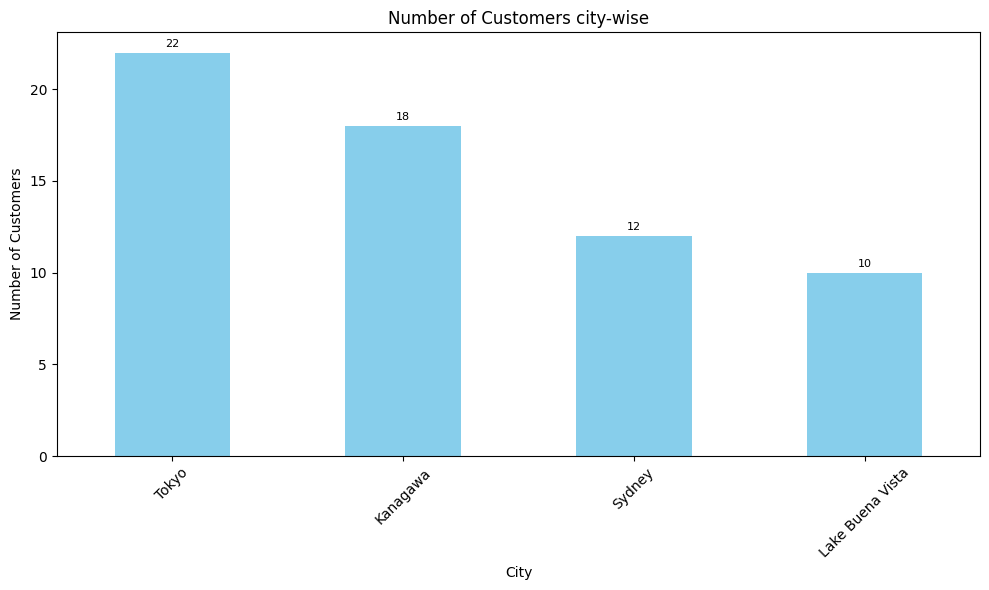

In [103]:
# identifying the total number of customers city-wise
customer_city_counts = customer_data['city'].value_counts()
plt.figure(figsize=(10, 6))
customer_city_counts.plot(kind='bar', title='Number of Customers city-wise', color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
# displaying exact values directly above each bar
for index, value in enumerate(customer_city_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

### **Number of Customers City-wise:**
   - **Insight:** The bar chart displays the distribution of customers across different cities.
   - **Inference:** Provides a geographical overview of the customer base, identifying cities with higher customer concentratio
   - **Observation:** Tokyo has the maximum number of customers whereas Lake Buena Vista has the minimum number of customers.

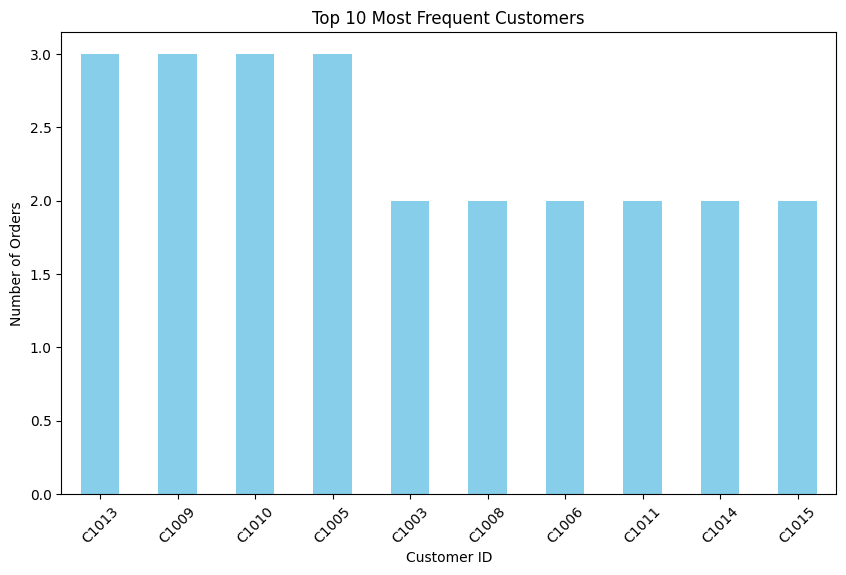

In [104]:
# identifying the most frequent customers based on their order history
frequent_customers = order_data['customer_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
frequent_customers.plot(kind='bar', title='Top 10 Most Frequent Customers', color='skyblue')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
# plt.grid(True)
plt.show()

### **Top 10 Most Frequent Customers:**
   - **Insight:** Identifies the customers with the highest order frequency.
   - **Inference:** Useful for recognizing and rewarding loyal customers, as well as tailoring marketing strategies for high-frequency customers.
   - **Observation:** Among the top 10 frequent customers, 4 of the customers have placed more orders than the rest.

## Product Analysis:

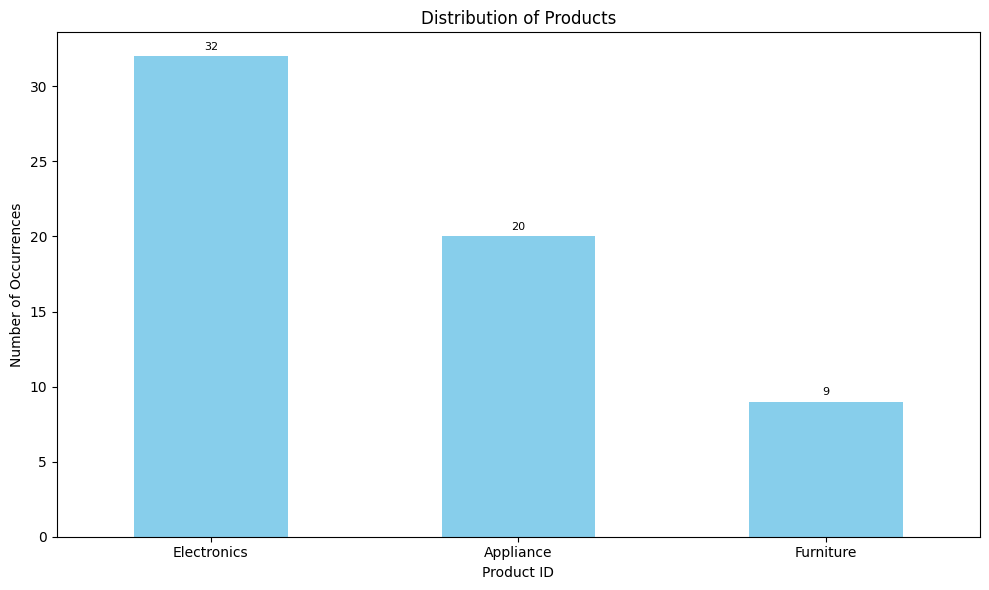

In [105]:
# determining the total number of products available by category
products_by_category = product_data['category'].value_counts()
plt.figure(figsize=(10, 6))
products_by_category.plot(kind='bar', title='Distribution of Products', color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
# displaying exact values directly above each bar
for index, value in enumerate(products_by_category):
    plt.text(index, value + 0.3, str(value), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

### **Distribution of Products by Category:**
   - **Insight:** Displays the total number of products available in each category.
   - **Inference:** Guides inventory management and marketing efforts by highlighting categories with a diverse product range.
   - **Observation:** Electronics category has the maximum number of products available while Furniture has the minimum.

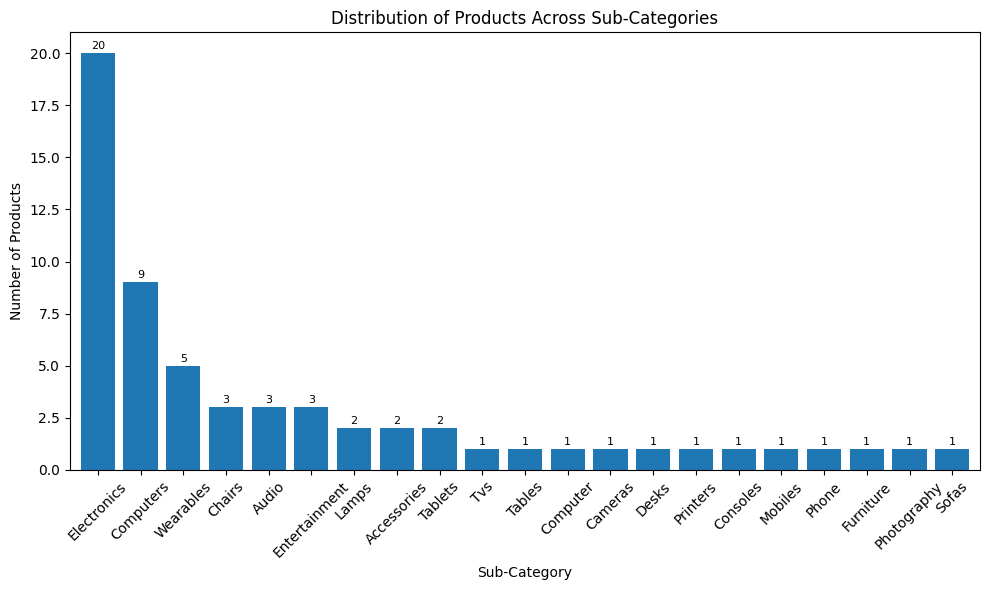

In [106]:
# analyzing the distribution of products across sub-categories
products_by_subcategory = product_data['sub_category'].value_counts()
plt.figure(figsize=(10, 6))
products_by_subcategory.plot(kind='bar', title='Distribution of Products Across Sub-Categories', width=0.8)
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
# displaying exact values directly above each bar
for index, value in enumerate(products_by_subcategory):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

### **Distribution of Products Across Sub-Categories:**
   - **Insight:** Illustrates the distribution of products across various sub-categories.
   - **Inference:** Useful for understanding the product mix and identifying areas for potential expansion or focus.
   - **Observation:** Electronics sub-category has the maximum number of products, followed by Computers, Wearables and so on.

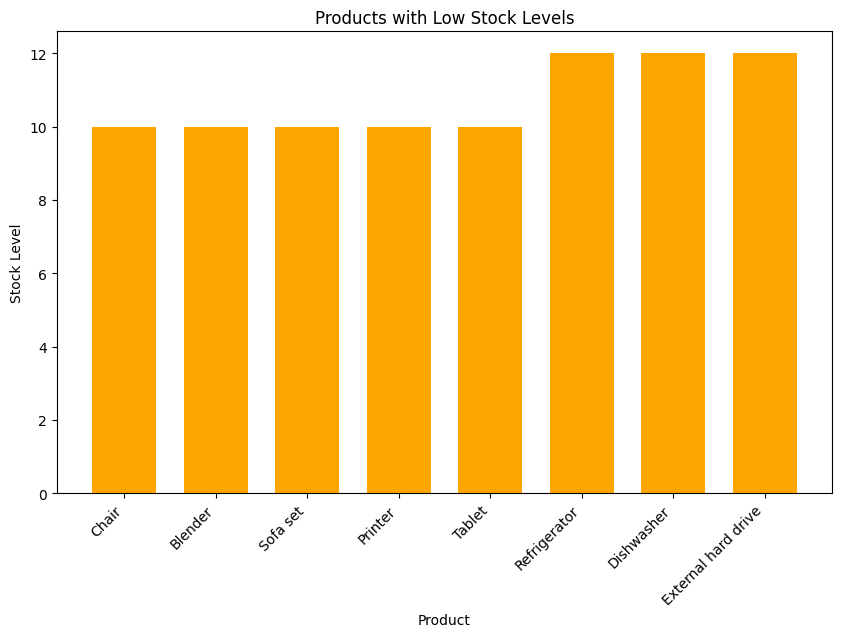

In [107]:
# identifying products with low stock levels
low_stock_products = product_data.nsmallest(9, 'stock')
plt.figure(figsize=(10, 6))
plt.bar(low_stock_products['product_name'], low_stock_products['stock'], color='orange', width=0.7)
plt.title('Products with Low Stock Levels')
plt.xlabel('Product')
plt.ylabel('Stock Level')
plt.xticks(rotation=45, ha='right')
# plt.grid(True)
plt.show()

### **Products with Low Stock Levels:**
   - **Insight:** Highlights products with the lowest stock levels.
   - **Inference:** Alerts to products that may need replenishment or special attention to avoid stockouts.
   - **Observation:** 3 products have stock level 12, rest have stock levels below 12.

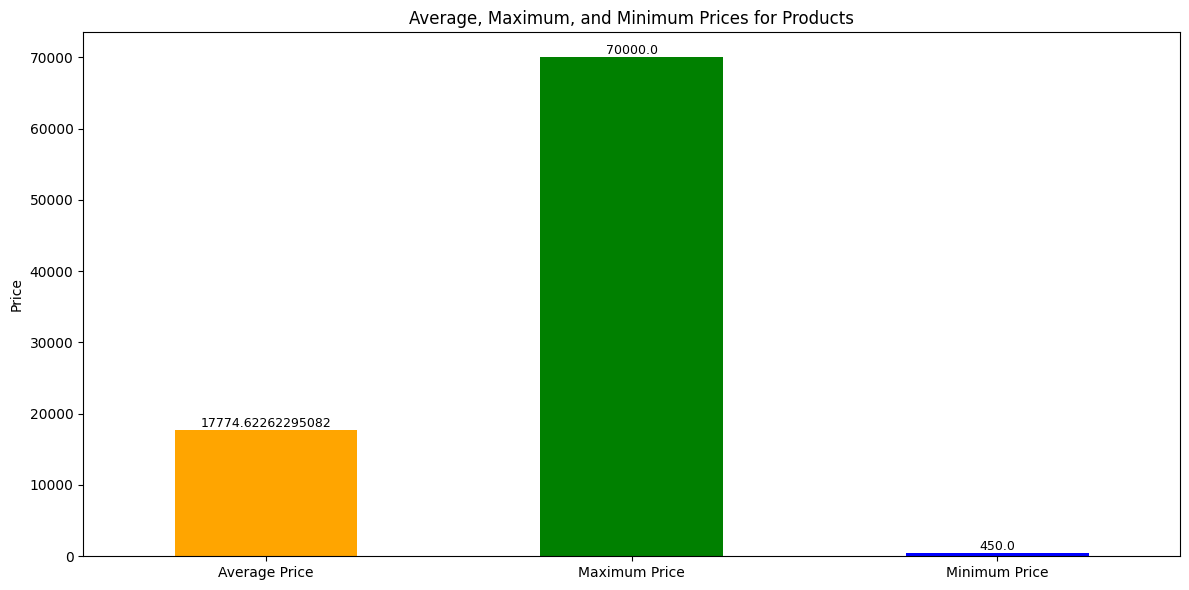

In [108]:
# calculating the average, maximum, and minimum prices for products
price_stats = product_data['selling_price'].agg(['mean', 'max', 'min'])
colors = ['orange', 'green', 'blue']
plt.figure(figsize=(12, 6))
price_stats.plot(kind='bar', ylabel='Price', title='Average, Maximum, and Minimum Prices for Products', color=colors, legend=False)
plt.xticks(range(len(price_stats.index)), ['Average Price', 'Maximum Price', 'Minimum Price'], rotation=0)
# displaying exact values directly above each bar
for index, value in enumerate(price_stats):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

### **Average, Maximum, and Minimum Prices for Products:**
   - **Insight:** Displays the average, maximum, and minimum selling prices for products.
   - **Inference:** Provides pricing insights for strategic decisions, such as setting competitive prices and managing profit margins.
   - **Observation:** The Average, Maximum and Minimum prices of products are Rs.17775.00, Rs.70000.00 and Rs.450.00 respectively.

## Order Analysis:

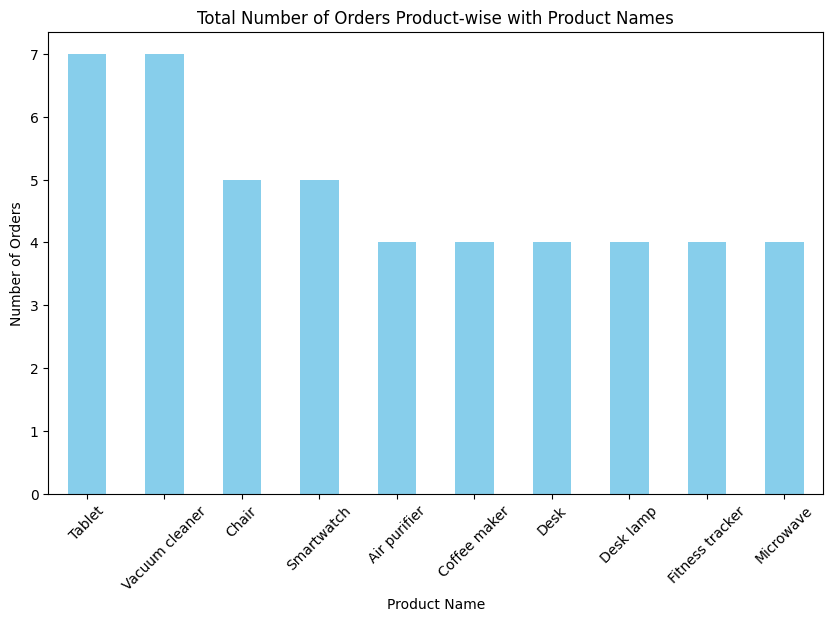

In [109]:
# calculating the top 10 orders product-wise
top_10_orders = product_order.groupby('product_name')['quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_orders.plot(kind='bar', title='Total Number of Orders Product-wise with Product Names', color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
# plt.grid(True)
plt.show()

### **Top 10 Orders Product-wise:**
   - **Insight:** Identifies the top 10 products with the highest order quantities.
   - **Inference:** Aids in understanding the popularity of specific products and planning inventory accordingly.
   - **Observation:** Tablet and Vacuum cleaner are the most ordered products, followed by Chair, Smartwatch and so on.

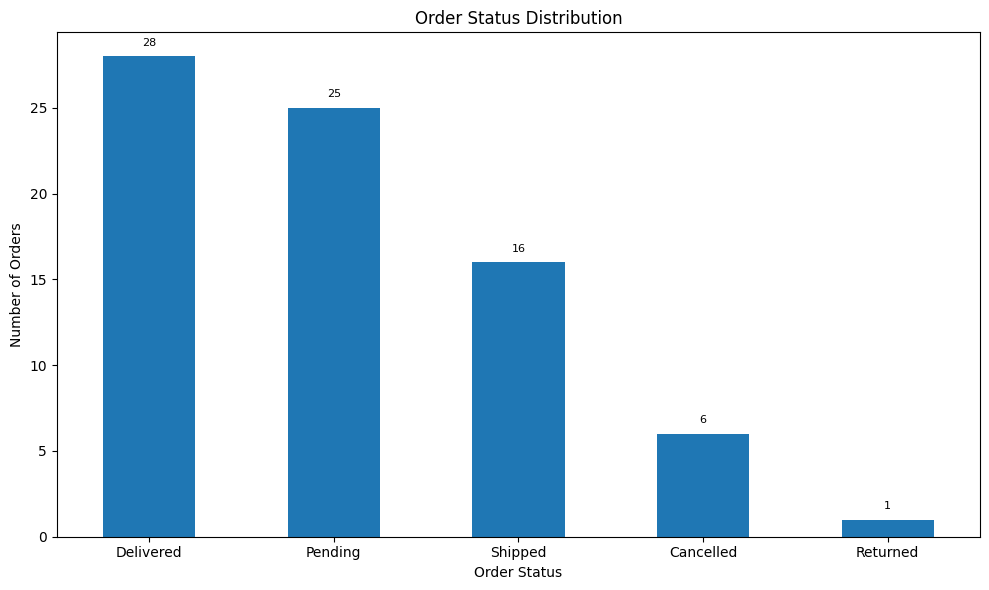

In [110]:
# analyzing the order status distribution
order_status_distribution = order_data['order_status'].value_counts()
plt.figure(figsize=(10, 6))
order_status_distribution.plot(kind='bar', title='Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
# displaying exact values directly above each bar
for index, value in enumerate(order_status_distribution):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

### **Order Status Distribution:**
   - **Insight:** Shows the distribution of orders based on their status.
   - **Inference:** Useful for monitoring and improving order fulfillment processes, ensuring timely deliveries.
   - **Observation:** Most of the products have been delivered, few have been cancelled and 1 has been returned so far.

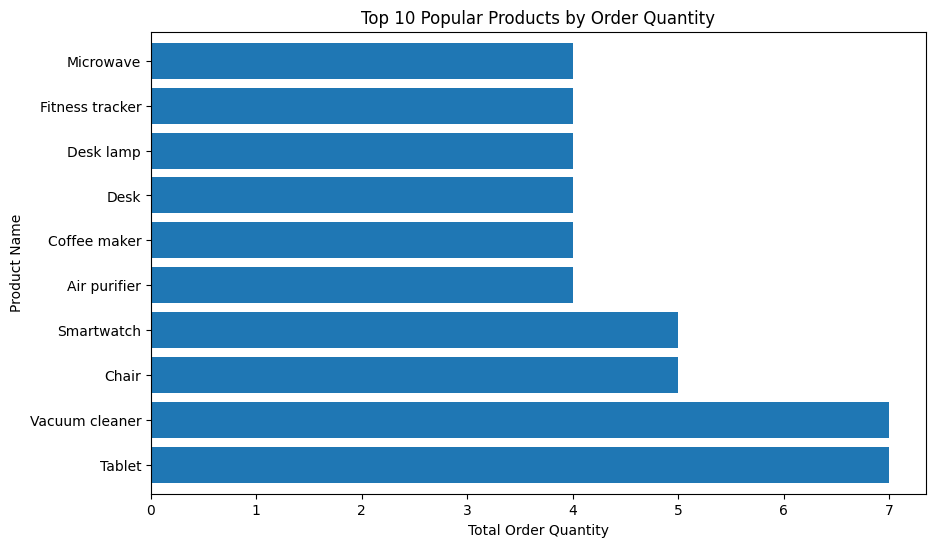

In [111]:
# identifying the most popular products based on order quantity
popular_products = product_order.groupby('product_name')['quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
popular_products.plot(kind='barh', title='Top 10 Popular Products by Order Quantity', width=0.8)
plt.xlabel('Total Order Quantity')
plt.ylabel('Product Name')
# plt.grid(True)
plt.show()

### **Top 10 Popular Products by Order Quantity:**
   - **Insight:** Highlights the top 10 products with the highest total order quantities.
   - **Inference:** Helps in identifying the most popular products, guiding marketing strategies and inventory management.
   - **Observation:** Tablet and Vacuum cleaner are the most popular products.

## Sales Analysis:

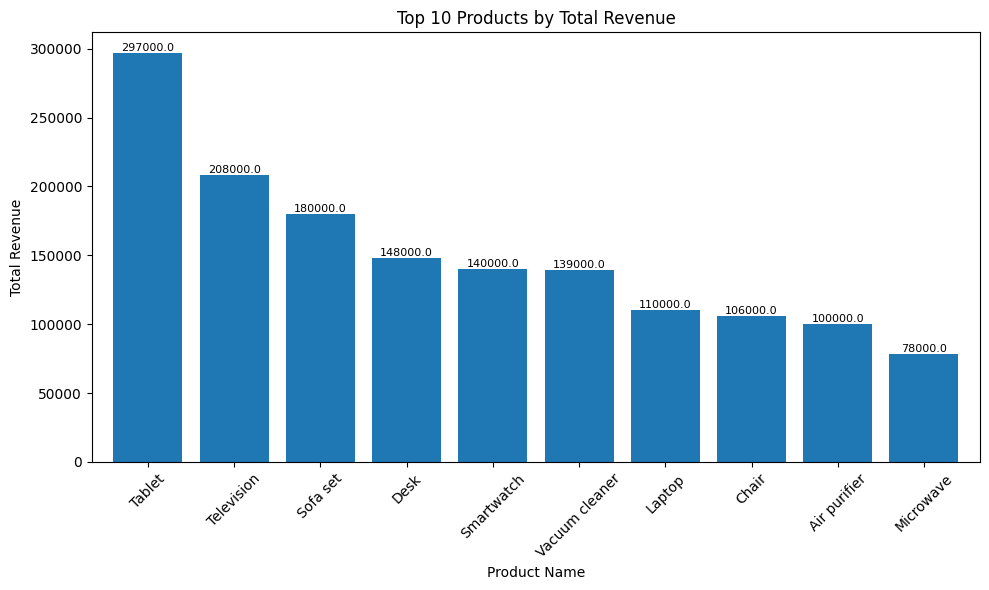

In [112]:
# calculating total revenue generated from orders product-wise
product_order['total_revenue'] = product_order['quantity'] * product_order['total_price']
total_revenue_product_wise = product_order.groupby('product_name')['total_revenue'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
total_revenue_product_wise.plot(kind='bar', xlabel='Product Name', ylabel='Total Revenue', title='Top 10 Products by Total Revenue', width=0.8)
plt.xticks(rotation=45)
# displaying exact values directly above each bar
for index, value in enumerate(total_revenue_product_wise):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

### **Top 10 Products by Total Revenue**
   - **Insight:** Calculates and visualizes the total revenue generated by the top 10 products.
   - **Insight:**  Helps identify the most lucrative products based on revenue.
   - **Observation:** Tablet has the highest revenue of Rs. 297000.00, followed by Television and Sofa set.

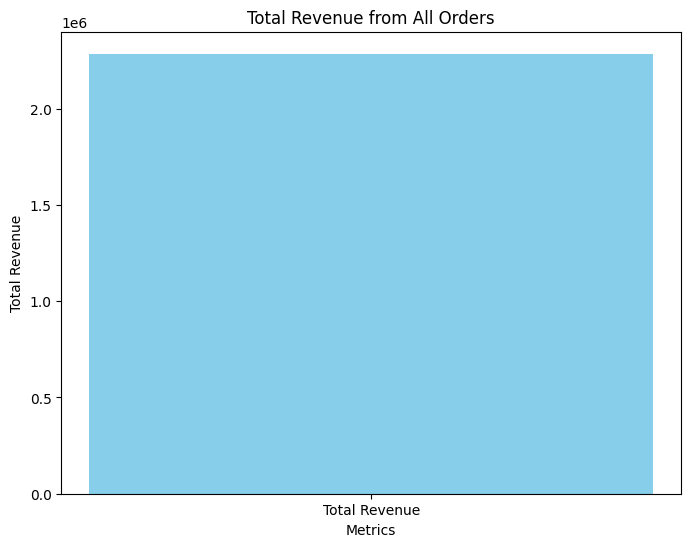

Total Revenue from all orders= Rs. 2284400.0


In [113]:
# calculating the total revenue generated from all orders
total_revenue_all_orders = product_order['total_revenue'].sum()
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue'], [total_revenue_all_orders], color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Total Revenue')
plt.title('Total Revenue from All Orders')
plt.show()
# displaying exact values directly from the dataframe
print('Total Revenue from all orders= Rs.', total_revenue_all_orders)

### **Total Revenue from All Orders**
   - **Insight:** Shows the overall revenue generated from all orders.
   - **Inference:**   Provides an overview of the business's total sales.
   - **Observation:** The total revenue collected is Rs. 2284400.00

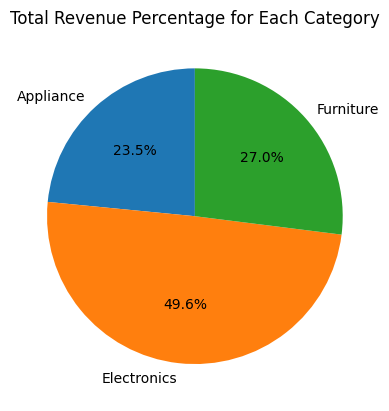

In [114]:
# calculating total revenue product category-wise percentage 
total_revenue_category_wise = product_order.groupby('category')['total_revenue'].sum()
total_revenue_category_wise_percentage = (total_revenue_category_wise / total_revenue_category_wise.sum()) * 100
total_revenue_category_wise_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Total Revenue Percentage for Each Category')
plt.ylabel('')
plt.show()

### **Total Revenue Percentage for Each Category**
   - **Insight:** Presents a pie chart depicting the contribution of each product category to total revenue.
   - **Inference:**  Gives insights into the revenue distribution across different categories.
   - **Observation:** The Electronics category has the highest revenue collected with a revenue percentage of 49.6%

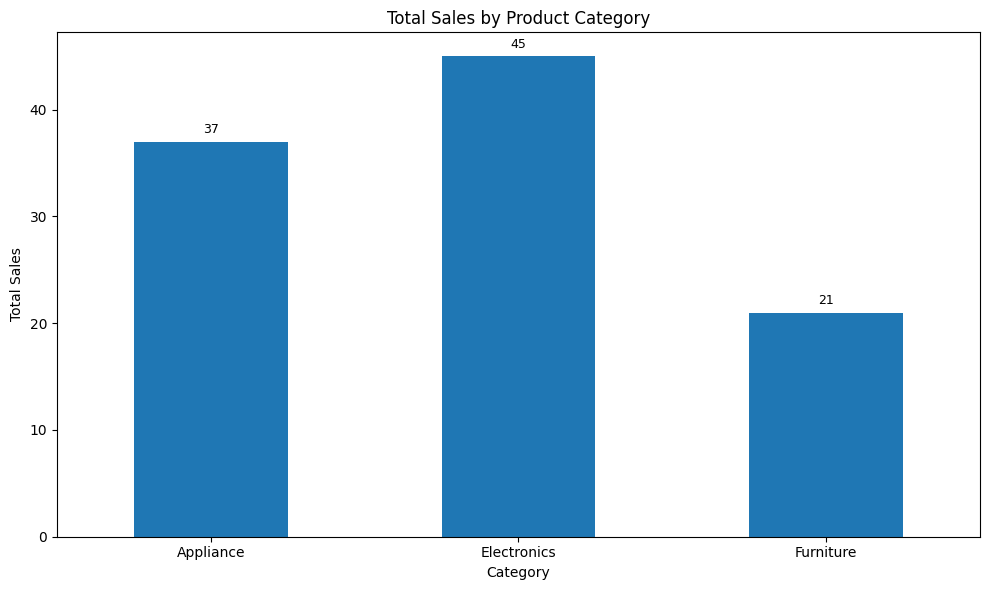

In [115]:
# analyzing the performance of different product categories in terms of sales
sales_by_category = product_order.groupby('category')['quantity'].sum()
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', xlabel='Category', ylabel='Total Sales', title='Total Sales by Product Category')
plt.xticks(rotation=0)
# displaying exact values directly above each bar
for index, value in enumerate(sales_by_category):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

### **Total Sales by Product Category**
   - **Insight:** Illustrates the total sales for each product category.
   - **Insight:** Helps understand the popularity of different product categories.
   - **Observation:** Electronics category has the highest sales whereas Furniture has the lowest.

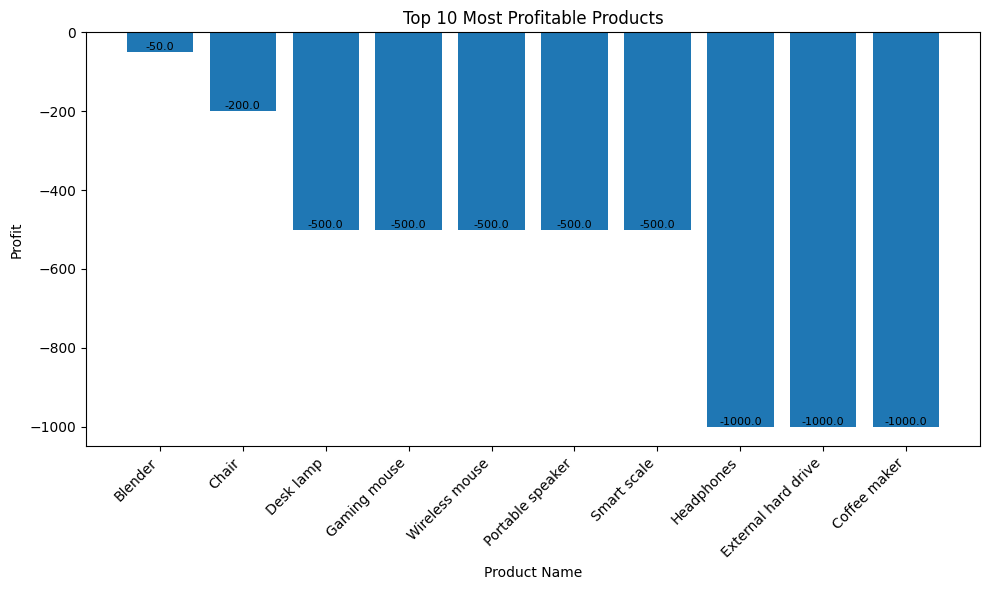

In [116]:
# identifying the most profitable products based on the difference between original and selling prices 
product_data['profit_margin'] = product_data['selling_price'] - product_data['original_price']
most_profitable_products = product_data.nlargest(10, 'profit_margin')[['product_name', 'profit_margin']]
plt.figure(figsize=(10, 6))
bars = plt.bar(most_profitable_products['product_name'], most_profitable_products['profit_margin'], width=0.8)
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
# displaying exact values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

### **Top 10 Most Profitable Products**
   - **Insight:** Identifies and displays the products with the highest profit margins.
   - **Inference:** Aids in recognizing the most profitable products for strategic focus.
   - **Observation:** Blender is the most profitable product, followed by Chair and so on.

## Customer Order Patterns:

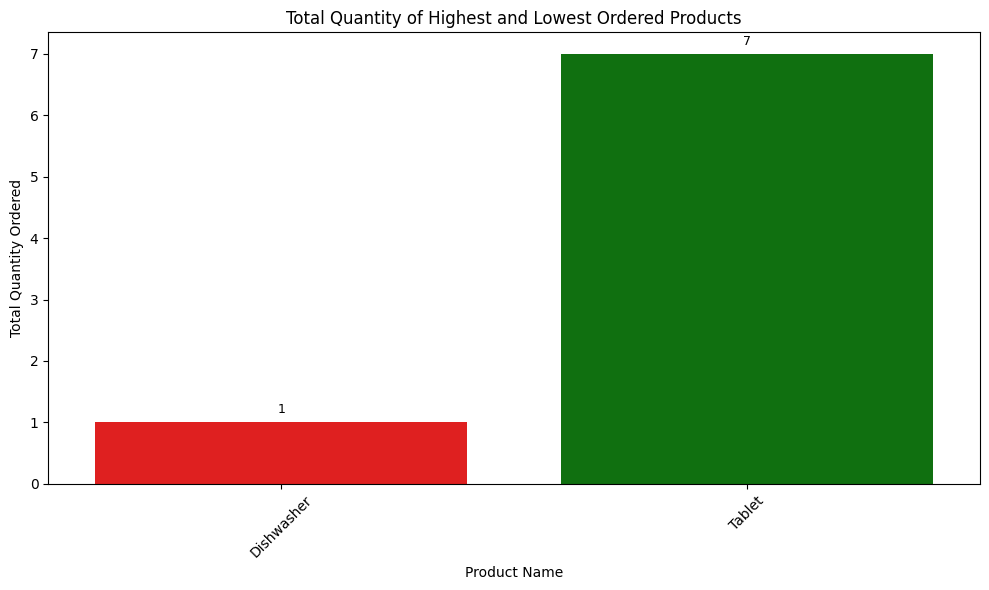

In [117]:
# identifying product names with the highest and lowest order quantities

# finding the highest and lowest ordered products
highest_ordered_product = product_order.groupby('product_name')['quantity'].sum().idxmax()
lowest_ordered_product = product_order.groupby('product_name')['quantity'].sum().idxmin()

# creating a dataframe with total quantity for the highest and lowest ordered products
top_and_bottom_products = product_order[product_order['product_name'].isin([highest_ordered_product, lowest_ordered_product])]
top_and_bottom_products_quantity = top_and_bottom_products.groupby(['product_name'])['quantity'].sum().reset_index()

colors = ['red', 'green']
plt.figure(figsize=(10, 6))
sns.barplot(data=top_and_bottom_products_quantity, x='product_name', y='quantity', hue='product_name', palette=colors)
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Quantity of Highest and Lowest Ordered Products')
plt.xticks(rotation=45)
# displaying exact values above each bar
for index, value in enumerate(top_and_bottom_products_quantity['quantity']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

### **Total Quantity of Highest and Lowest Ordered Products**
   - **Insight:** Compares the total quantity of the highest and lowest ordered products.
   - **Inference:** Useful for understanding the demand disparity among products.
   - **Observation:** Tablet is the most ordered product whereas Dishwasher is the least ordered product.

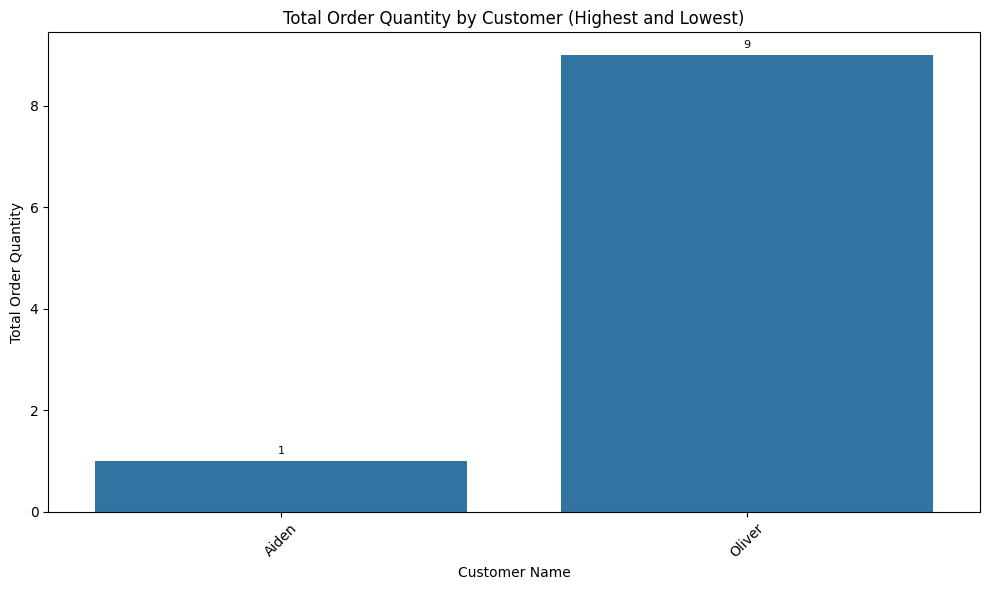

In [118]:
# identifying customers with the highest and lowest order quantities by customer name 

# finding the customer with the highest and lowest order quantities
highest_ordered_customer = customer_product_order.groupby('name')['quantity'].sum().idxmax()
lowest_ordered_customer = customer_product_order.groupby('name')['quantity'].sum().idxmin()

# creating a dataframe with total quantity for the highest and lowest ordered customers
top_and_bottom_customers = customer_product_order[customer_product_order['name'].isin([highest_ordered_customer, lowest_ordered_customer])]
top_and_bottom_customers_quantity = top_and_bottom_customers.groupby(['name'])['quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_and_bottom_customers_quantity, x='name', y='quantity')
plt.xlabel('Customer Name')
plt.ylabel('Total Order Quantity')
plt.title('Total Order Quantity by Customer (Highest and Lowest)')
plt.xticks(rotation=45)
# displaying exact values above each bar
for index, value in enumerate(top_and_bottom_customers_quantity['quantity']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

### **Total Order Quantity by Customer (Highest and Lowest)**
   - **Insight:** Highlights the customers with the highest and lowest order quantities.
   - **Inference:** Offers insights into customer ordering patters.
   - **Observation:** The customer named Oliver has placed the maximum number of orders whereas Aiden has placed the minimum number of orders.

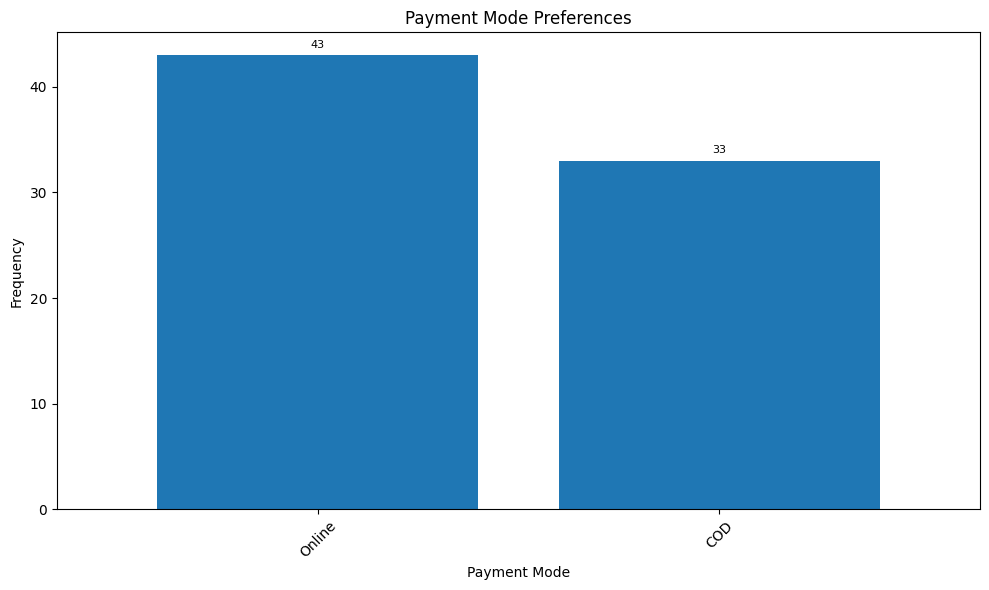

In [119]:
# determining the most preferred payment modes
preferred_payment_modes = order_data['payment_mode'].value_counts()
plt.figure(figsize=(10, 6))
preferred_payment_modes.plot(kind='bar', xlabel='Payment Mode', ylabel='Frequency', title='Payment Mode Preferences', width=0.8)
plt.xticks(rotation=45)
# displaying exact values directly above each bar
for index, value in enumerate(preferred_payment_modes):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

### **Payment Mode Preferences**
   - **Insight:** Analyzes the distribution of preferred payment modes.
   - **Inference:** Provides information on the most commonly used payment methods.
   - **Observation:** Most customers prefer online payment mode.

## Time-based Analysis:

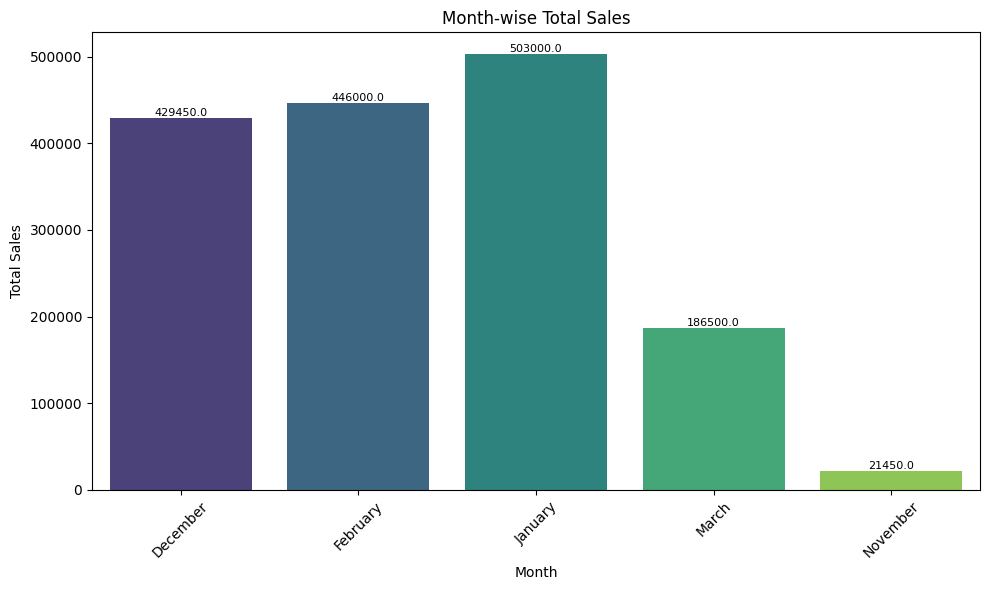

In [120]:
# calculating month-wise total sales 
month_wise_sales = order_data.groupby('order_month')['total_price'].sum()
custom_palette = sns.color_palette("viridis", len(month_wise_sales))
plt.figure(figsize=(10, 6))
sns.barplot(x=month_wise_sales.index, y=month_wise_sales.values, hue=month_wise_sales.index, palette=custom_palette)
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
# displaying exact values directly above each bar
for index, value in enumerate(month_wise_sales):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

### **Month-wise Total Sales**
   - **Insight:** Displays the total sales for each month.
   - **Inference:** Helps identify sales patterns and seasonality.
   - **Observation:** January has the highest sales of Rs. 503000.00 whereas November has the lowest sales of Rs. 21450.00

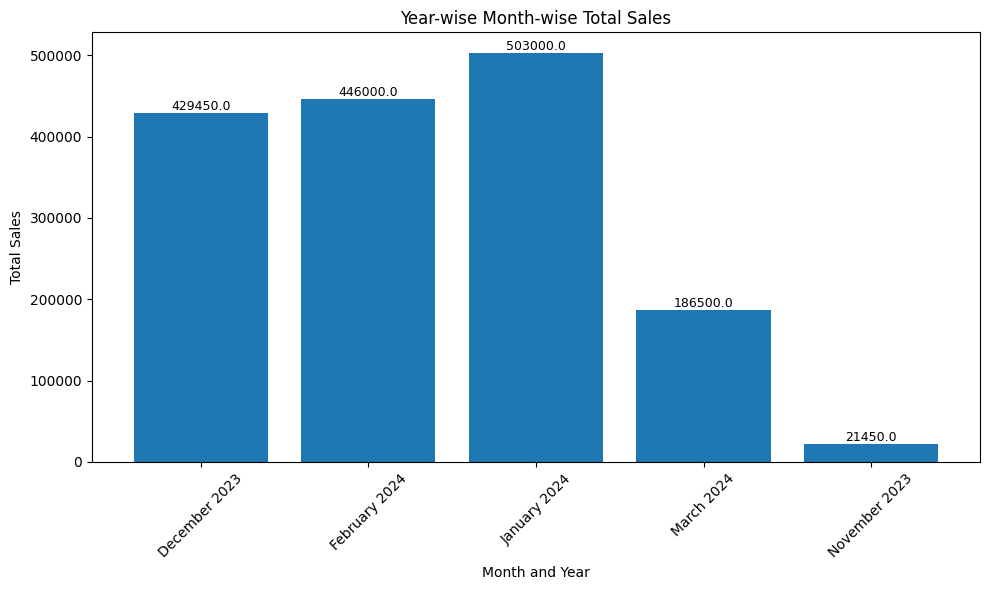

In [121]:
# calculating month and year-wise total sales
monthly_yearly_sales = order_data.groupby('order_month_year')['total_price'].sum()
plt.figure(figsize=(10, 6))
monthly_yearly_sales.plot(kind='bar', xlabel='Month and Year', ylabel='Total Sales', title='Year-wise Month-wise Total Sales', width=0.8)
plt.xticks(rotation=45)
# displaying exact values directly above each bar
for index, value in enumerate(monthly_yearly_sales):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

### **Year-wise Month-wise Total Sales**
   - **Insight:** Shows total sales, grouped by both year and month.
   - **Inference:** Gives a detailed view of sales trends over different years and months.
   - **Observation:** January 2024 has the highest sales of Rs. 503000.00 whereas November 2023 has the lowest sales of Rs. 21450.00

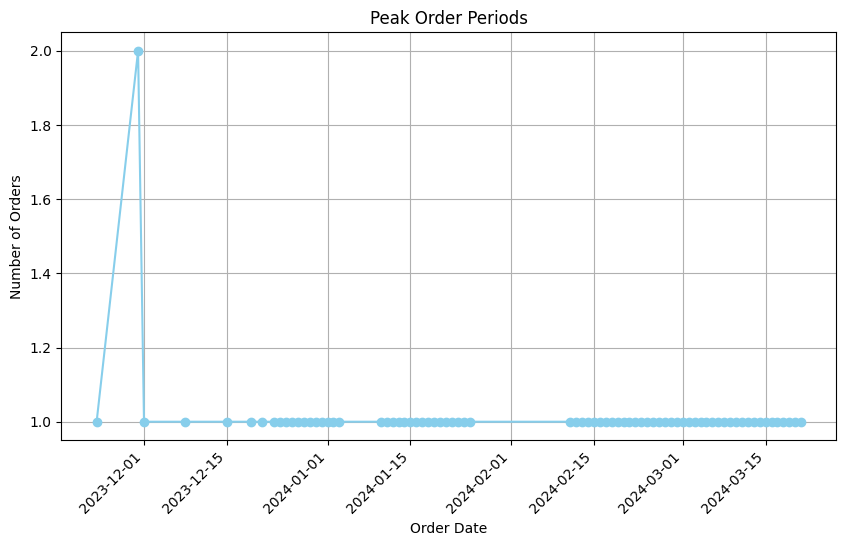

In [122]:
# identifying peak order date 
daily_orders = order_data['order_date'].value_counts().sort_index()
peak_order_date = daily_orders.idxmax()
peak_order_count = daily_orders.max()
plt.figure(figsize=(10, 6))
daily_orders.plot(kind='line', marker='o', xlabel='Order Date', ylabel='Number of Orders', title='Peak Order Periods', color='skyblue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### **Peak Order Periods**
   - **Insight:** Highlights the periods with the highest number of orders.
   - **Inference:** Useful for managing resources during peak tims.
   - **Observation:** The most number of orders were placed in the month of January 2024. 

## Geographical Analysis:

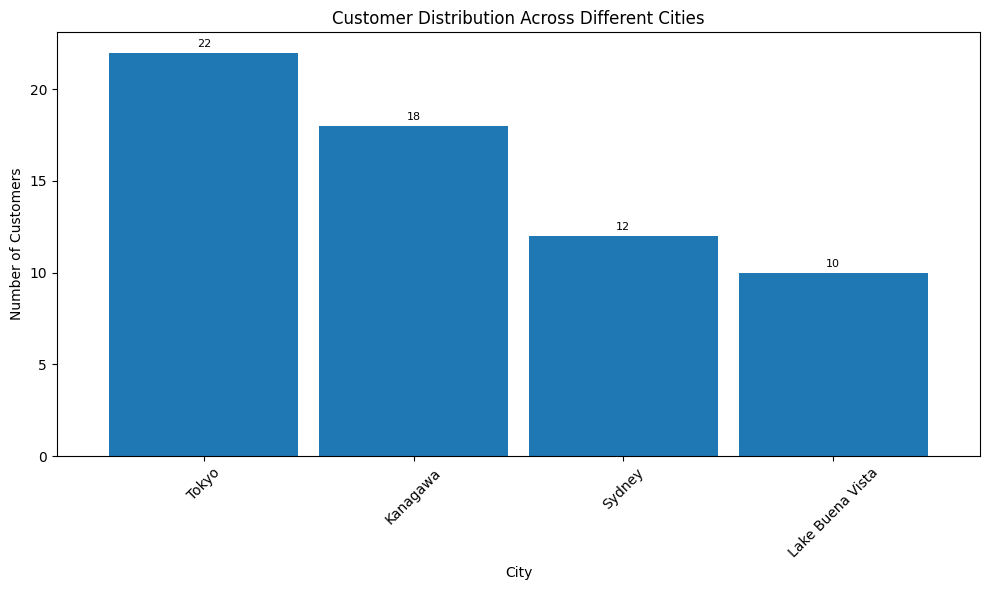

In [123]:
# exploring the distribution of customers across different cities 
customer_city_distribution = customer_data['city'].value_counts()
plt.figure(figsize=(10, 6))
customer_city_distribution.plot(kind='bar', xlabel='City', ylabel='Number of Customers', title='Customer Distribution Across Different Cities', width=0.9)
plt.xticks(rotation=45)
# displaying exact values directly above each bar
for index, value in enumerate(customer_city_distribution):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

### **Customer Distribution Across Different Cities**
   - **Insight:** Presents a bar chart of the distribution of customers across different cities.
   - **Inference:** Offers insights into the geographical reach of the customer base.
   - **Observation:** Most of the customers are from Tokyo city.

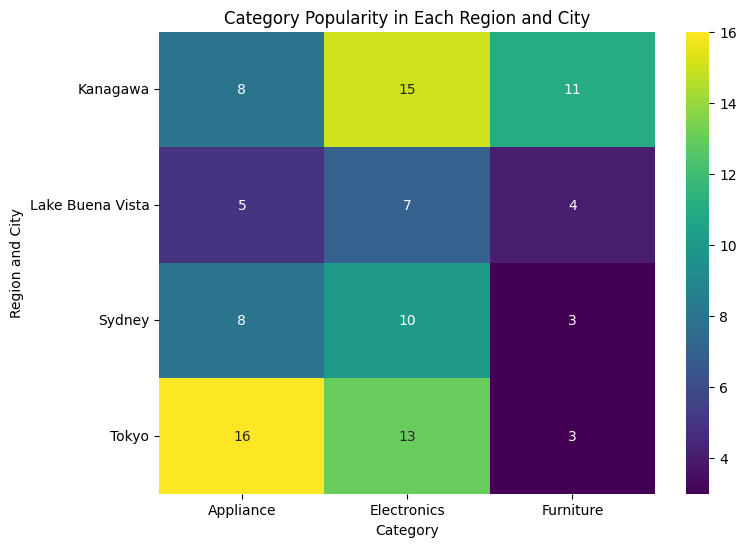

In [124]:
# analyzing whether certain products or categories are more popular in a specific city 
city_product_popularity = customer_product_order.groupby(['city', 'category'])['quantity'].sum().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(city_product_popularity, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': ''})
plt.title('Category Popularity in Each Region and City')
plt.xlabel('Category')
plt.ylabel('Region and City')
plt.yticks(rotation=0)
plt.show()

### **Category Popularity in Each Region and City**
   - **Insight:** Uses a heatmap to visualize the popularity of product categories across cities.
   - **Inference:** Identifies regional preferences for different product categories, where,
       - **Color Intensity:** The color intensity in each cell represents the quantity of products sold in a specific category for a given region and city. Lighter colors indicate higher quantities.
       - **Annotations:** The numerical values in each cell (if `annot=True`) represent the exact quantity of products sold.
   - **Observation:** Products from the—
       - *Electronic* category have been sold in higher quantities in all the regions and cities with products been sold mostly in Kanagawa city.
       - *Appliance* category have been sold mostly in Tokyo city.
       - *Furniture* category have been sold mostly in Kanagawa city.

## Product Performance:

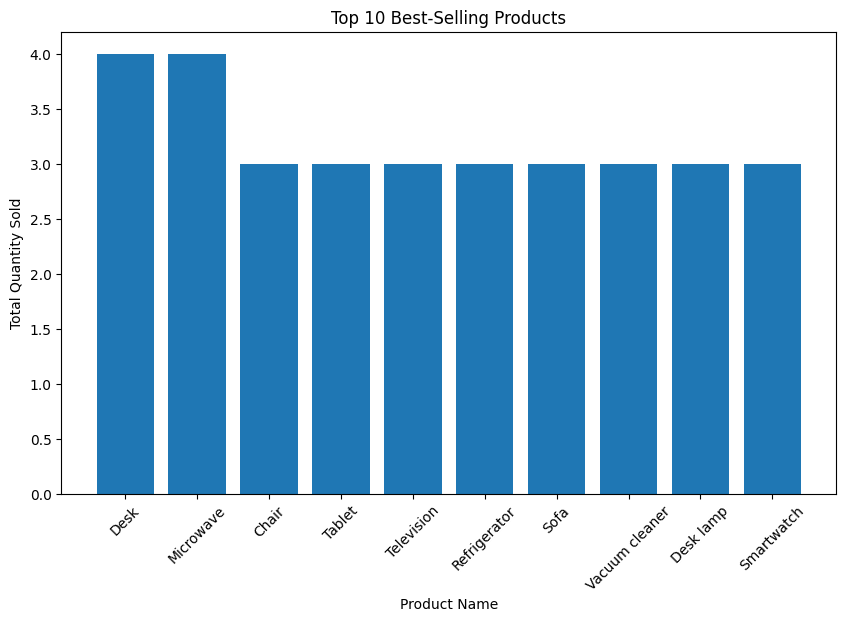

In [125]:
# identifying the top 10 best-selling products
best_selling_products = product_order.groupby(['product_id', 'product_name'])['quantity'].sum().nlargest(10)
best_selling_products = best_selling_products.reset_index()  
product_names = best_selling_products['product_name']
quantity_sold = best_selling_products['quantity']
plt.figure(figsize=(10, 6))
bar = plt.bar(product_names, quantity_sold, label='Total Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
# plt.grid(True)
plt.show()

### **Top 10 Best-Selling Products**
   - **Insight:** Identifies and displays the top 10 best-selling products.
   - **Inference:** Helps focus on high-performing products for marketing strategies.
   - **Observation:** Among the top 10 best-selling product, Desk and Microwave are the top 2 best-selling product.

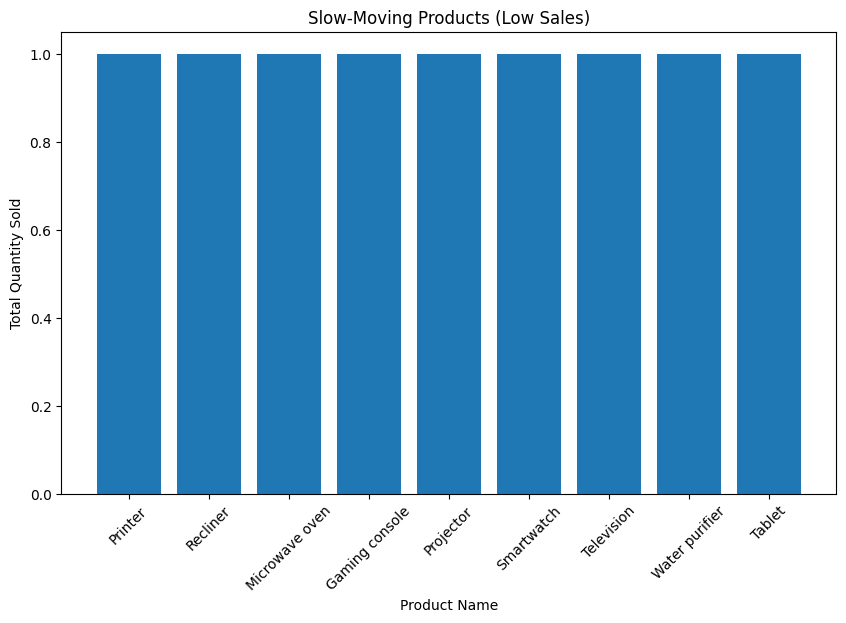

In [126]:
# identifying top 10 slow-moving products based on low sales
slow_moving_products = product_order.groupby(['product_id', 'product_name'])['quantity'].sum().nsmallest(10)
slow_moving_products = slow_moving_products.reset_index()  # Reset the index for merging
product_names = slow_moving_products['product_name']
quantity_sold = slow_moving_products['quantity']
plt.figure(figsize=(10, 6))
plt.bar(product_names, quantity_sold) 
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Slow-Moving Products (Low Sales)')
plt.xticks(rotation=45)
# plt.grid(True)
plt.show()

### **Slow-Moving Products (Low Sales)**
   - **Insight:** Illustrates the products with the lowest sales, identifying slow movers.
   - **Inference:** Alerts to products that may require additional marketing efforts.
   - **Observation:** These products have been sold in very low quantities.

## Customer Retention:

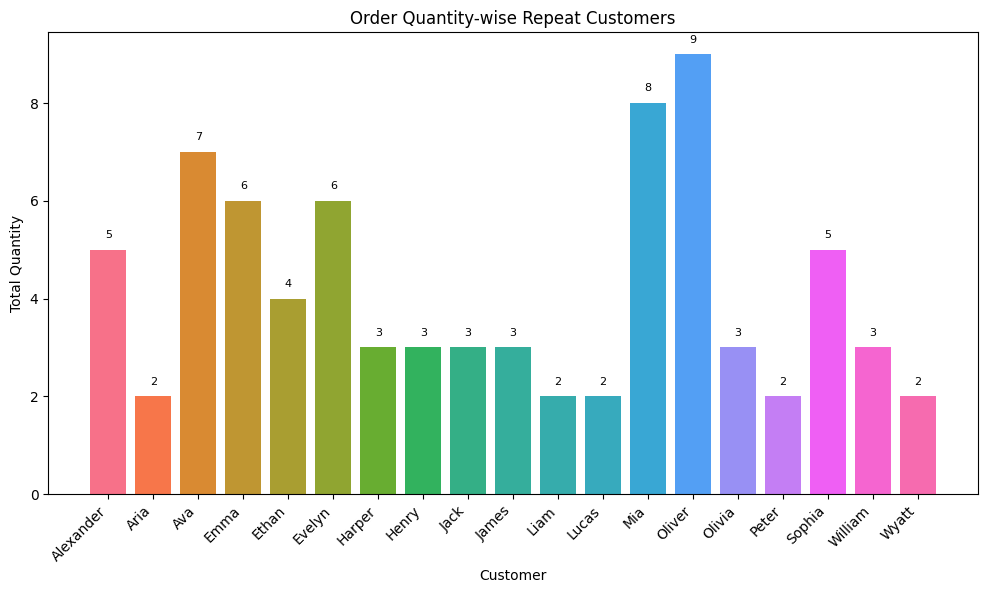

In [127]:
# analyzing repeat customers and their order patterns

# identifying customers who have ordered more than once
customers_more_than_once = customer_product_order['name'].value_counts() > 1
customers_more_than_once = customers_more_than_once[customers_more_than_once].index
# creating dataframe containing only customers who have ordered more than once
customers_more_than_once_data = customer_product_order[customer_product_order['name'].isin(customers_more_than_once)]
# defining a color palette with enough unique colors for each customer
palette = sns.color_palette("husl", n_colors=len(customers_more_than_once_data['name'].unique()))
# plotting a bar chart for the total quantity of orders for customers who have ordered more than once
plt.figure(figsize=(12, 6))
bars = []
for i, (customer_id, group) in enumerate(customers_more_than_once_data.groupby('name')):
    total_quantity = group['quantity'].sum()
    color = palette[i]
    bar = plt.bar(customer_id, total_quantity, color=color)
    bars.append(bar)
    # displaying exact values above each bar
    plt.text(customer_id, total_quantity + 0.2, str(total_quantity), ha='center', va='bottom', fontsize=8, color='black')
plt.title('Order Quantity-wise Repeat Customers')
plt.xlabel('Customer')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

### **Order Quantity-wise Repeat Customers**
   - **Insight:** Visualizes the order quantity for customers who have ordered more than once.
   - **Inference:** Provides insights into customer loyalty and order frequeny.
   - **Observation:** Oliver is the most repeated customer, who has placed orders more frequently, followed by Mia, Ava and so on.

In [128]:
# calculating customer retention rates over time

# converting 'order_month_year' to datetime format
orders_per_customer_monthly['order_month_year'] = pd.to_datetime(orders_per_customer_monthly['order_month_year'], format='%B %Y')

# sorting the dataframe by 'order_month_year'
orders_per_customer_monthly = orders_per_customer_monthly.sort_values(by='order_month_year')

# identifying repeat customers (customers with more than one order)
repeat_customers_monthly = orders_per_customer_monthly[orders_per_customer_monthly['order_count'] > 1]

# calculating customer retention rates over time
retention_data = repeat_customers_monthly.groupby('order_month_year')['customer_id'].nunique()
total_customers = customer_data['customer_id'].nunique()
retention_rate = (retention_data / total_customers) * 100

# plotting the customer retention rates over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=retention_rate.index.strftime('%Y-%m'), y=retention_rate.values, marker='o')
plt.title('Customer Retention Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.show()


NameError: name 'orders_per_customer_monthly' is not defined

### **Customer Retention Over Time**
   - **Insight:** The line plot illustrates the customer retention rates over time, offering insights into customer loyalty on a monthly basis.
   - **Inference:** Analyze trends to understand periods of improved or reduced retention, helping to adapt strategies accordingly.
   - **Observation:** Retention rates were higher between the time period of December 2023 to January 2024.

## Payment Analysis:

In [ ]:
# displaying successful and pending payments order counts
payment_status_counts = order_data['order_status'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(payment_status_counts.index, payment_status_counts)  
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Order Status Distribution')
plt.xticks(rotation=0)
# displaying exact values directly above each bar
for index, value in enumerate(payment_status_counts):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

### **Order Status Distribution**
   - **Insight:** Displays the distribution of successful and pending payment orders.
   - **Inference:** Gives an overview of order fulfillment status.
   - **Observation:** Most of the orders have been successfully delivered, that means successful payments have been made for those orders.

## Additional Analyses:

In [ ]:
# calculating quantity-wise and year-wise top 10 customers 

# filtering data for customers who have ordered more than once in the year 2023
customers_more_than_once_2023 = customer_product_order[customer_product_order['order_year'] == 2023]['name'].value_counts() > 1
customers_more_than_once_2023 = customers_more_than_once_2023[customers_more_than_once_2023].index

# creating a dataframe containing only customers who have ordered more than once in the year 2023
customers_more_than_once_data_2023 = customer_product_order[
    (customer_product_order['order_year'] == 2023) & (customer_product_order['name'].isin(customers_more_than_once_2023))
]

# getting the top 10 customers by the total quantity of orders in the year 2023
top_10_customers_2023 = customers_more_than_once_data_2023.groupby('name')['quantity'].sum().nlargest(10).index

# filtering data for the top 10 customers in the year 2023
top_10_customers_data_2023 = customers_more_than_once_data_2023[
    customers_more_than_once_data_2023['name'].isin(top_10_customers_2023)
]

# filtering data for customers who have ordered more than once in the year 2024
customers_more_than_once_2024 = customer_product_order[customer_product_order['order_year'] == 2024]['name'].value_counts() > 1
customers_more_than_once_2024 = customers_more_than_once_2024[customers_more_than_once_2024].index

# creating a DataFrame containing only customers who have ordered more than once in the year 2024
customers_more_than_once_data_2024 = customer_product_order[
    (customer_product_order['order_year'] == 2024) & (customer_product_order['name'].isin(customers_more_than_once_2024))
]

# getting the top 10 customers by the total quantity of orders in the year 2024
top_10_customers_2024 = customers_more_than_once_data_2024.groupby('name')['quantity'].sum().nlargest(10).index

# filtering data for the top 10 customers in the year 2024
top_10_customers_data_2024 = customers_more_than_once_data_2024[
    customers_more_than_once_data_2024['name'].isin(top_10_customers_2024)
]

# creating a pivot table for better plotting
pivot_table = pd.concat([top_10_customers_data_2023, top_10_customers_data_2024]).pivot_table(
    index='order_year', columns='name', values='quantity', aggfunc='sum'
)

# creating a grouped bar plot
plt.figure(figsize=(14, 8))
ax = pivot_table.plot(kind='bar', width=0.8, colormap='viridis')

# moving the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.title('Quantity of Orders for Top 10 Customers in 2023 and 2024')
plt.xticks(rotation=45)
# plt.grid(True)
plt.show()

### **Quantity of Orders for Top 10 Customers in 2023 and 2024**
   - **Insight:** Compares the order quantity for the top 10 customers across the years 2023 and 2024.
   - **Inference:** Highlights the consistency or changes in top customer behavir.
   - **Observation:** Most of the orders were placed in the year 2024, where Ava and Oliver have placed most of the orders, followed by Evelyn and Peter.

In [ ]:
# analyzing the top 5 customers who have ordered more than once in the year 2023

# filtering data for customers who have ordered more than once in the year 2023
customers_more_than_once_2023 = customer_product_order[customer_product_order['order_year'] == 2023]['name'].value_counts() > 1
customers_more_than_once_2023 = customers_more_than_once_2023[customers_more_than_once_2023].index

# creating a dataframe containing only customers who have ordered more than once in the year 2023
customers_more_than_once_data_2023 = customer_product_order[
    (customer_product_order['order_year'] == 2023) & (customer_product_order['name'].isin(customers_more_than_once_2023))
]

# getting the top 5 customers by the total quantity of orders in the year 2023
top_5_customers_2023 = customers_more_than_once_data_2023.groupby('name')['quantity'].sum().nlargest(5).index

# filtering data for the top 5 customers in the year 2023
top_5_customers_data_2023 = customers_more_than_once_data_2023[
    customers_more_than_once_data_2023['name'].isin(top_5_customers_2023)
]

# ensuring 'order_month' is a categorical with custom ordering
top_5_customers_data_2023['order_month'] = pd.Categorical(top_5_customers_data_2023['order_month'], categories=calendar.month_name[1:], ordered=True)

# extracting and filtering unique months with data
months_with_data = top_5_customers_data_2023['order_month'].unique()

# filtering pivot_table_2023 to include only months with data
pivot_table_2023 = pivot_table_2023.loc[months_with_data]

# creating a grouped bar plot for the year 2023
plt.figure(figsize=(14, 8))
ax = pivot_table_2023.plot(kind='bar', width=0.8, colormap='viridis')

# adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Quantity of Orders for Top 5 Customers and Month in 2023')
plt.xticks(rotation=45)

# setting the legend names as the actual customer names
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Customers', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.grid(True)
plt.show()

### **Quantity of Orders for Top 5 Customers and Month in 2023**
   - **Insight:** Analyzes the order quantity for the top 5 customers each month in 2023.
   - **Inference:** Provides insights into monthly variations in top customer purchases.
   - **Observation:** Most of the orders were placed in the month of December, where Emma and Oliver have placed most of the orders.

In [ ]:
# analyzing the top 5 customers who have ordered more than once in the year 2024

# filtering data for customers who have ordered more than once in the year 2024
customers_more_than_once_2024 = customer_product_order[customer_product_order['order_year'] == 2024]['name'].value_counts() > 1
customers_more_than_once_2024 = customers_more_than_once_2024[customers_more_than_once_2024].index

# creating a dataframe containing only customers who have ordered more than once in the year 2024
customers_more_than_once_data_2024 = customer_product_order[
    (customer_product_order['order_year'] == 2024) & (customer_product_order['name'].isin(customers_more_than_once_2024))
]

# getting the top 5 customers by the total quantity of orders in the year 2024
top_5_customers_2024 = customers_more_than_once_data_2024.groupby('name')['quantity'].sum().nlargest(5).index

# filtering data for the top 5 customers in the year 2024
top_5_customers_data_2024 = customers_more_than_once_data_2024[
    customers_more_than_once_data_2024['name'].isin(top_5_customers_2024)
]

# ensuring 'order_month' is a categorical with custom ordering
top_5_customers_data_2024.loc[:, 'order_month'] = pd.Categorical(top_5_customers_data_2024['order_month'], categories=calendar.month_name[1:], ordered=True)

# extracting and filtering unique months with data
months_with_data_2024 = top_5_customers_data_2024['order_month'].unique()

# filtering pivot_table_2024 to include only months with data
pivot_table_2024 = top_5_customers_data_2024.pivot_table(index='order_month', columns='name', values='quantity', aggfunc='sum').reindex(months_with_data_2024)

# creating a grouped bar plot for the year 2024
plt.figure(figsize=(14, 8))
ax = pivot_table_2024.plot(kind='bar', width=0.8, colormap='viridis')

# adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Quantity of Orders for Top 5 Customers and Month in 2024')
plt.xticks(rotation=45)

# setting the legend names as the actual customer names
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Customers', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.grid(True)
plt.show()

### **Quantity of Orders for Top 5 Customers and Month in 2024**
   - **Insight:** Analyzes the order quantity for the top 5 customers each month in 2024.
   - **Inference:** Provides insights into monthly variations in top customer purchases.
   - **Observation:** Most of the orders were placed in the month of January, where Ava, Evelyn and Oliver have placed most of the orders.

In [ ]:
# calculating the average time taken to process and deliver orders
order_data['processing_time'] = (order_data['order_date'] - order_data['order_date'].shift()).dt.days
avg_processing_time = order_data['processing_time'].mean()
plt.figure(figsize=(8, 6))
plt.bar(['Average Processing Time'], [avg_processing_time], color='green')
plt.ylabel('Average Processing Time (Days)')
plt.title('Average Time Taken to Process and Deliver Orders')
plt.show()
print('Average Time Taken to Process and Deliver Orders= ', avg_processing_time)

### **Average Time Taken to Process and Deliver Orders**
   - **Insight:** Calculates and visualizes the average time taken to process and deliver orders.
   - **Inference:** Helps in assessing the efficiency of order processing and delivey.
   - **Observation:** The average time taken to process and deliver orders is 1 and a half days approx.

In [ ]:
# analyzing the impact of discounts on product sales
plt.figure(figsize=(10, 6))
discount = product_order['original_price'] - product_order['selling_price']
sns.lineplot(x=discount, y=product_order['quantity'], marker='o')
plt.xlabel('Discount (Original Price - Selling Price)')
plt.ylabel('Quantity')
plt.title('Impact of Discounts on Product Sales')
plt.show()

### **Impact of Discounts on Product Sales**
   - **Insight:** Uses linear plot to explore the impact of discount on quantity of orders purchased.
   - **Inference:** Aids in understanding how discounts may influence sales.
   - **Observation:** More products were ordered when the discount rates were ranging from Rs. 0.00 to Rs. 4000.00

In [ ]:
# identifying products with consistent or fluctuating stock levels
product_stock_trend = product_data.groupby('product_name')['stock'].mean()
plt.figure(figsize=(10, 6))
product_stock_trend.plot(kind='line', xlabel='Product', ylabel='Average Stock Level', title='Stock Trend Over Time')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### **Stock Trend Over Time**
   - **Insight:** Shows the average stock level trend for each product over time.
   - **Inference:** Helps identify products with consistent or fluctuating stock levels.
   - **Observation:** Smart speaker has the most fluctuating stock levels.

In [ ]:
# determining the relation between payment modes and order values
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='payment_mode', y='total_price', data=order_data, errorbar=None)
# displaying exact values above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Payment Mode')
plt.ylabel('Total Price')
plt.title('Relation between Payment Modes and Order Values')
plt.show()

### **Correlation between Payment Modes and Order Values**
   - **Insight:** Uses a bar plot to analyze the correlation between different payment modes and order values.
   - **Inference:** Offers insights into payment mode preferences and corresponding order values.
   - **Observation:** Order for Rs. 21197.67 has been made by Online payment mode and Rs.20451.52 has been made by COD payment mode.

## **Conclusion:**

### Customer Analysis:
- **Total Number of Customers City-Wise:**
  - Insights into the distribution of customers across different cities aid in identifying potential areas for marketing and customer engagement.

- **Most Frequent Customers Based on Order History:**
  - Recognition of customers frequently placing orders is crucial for personalized marketing and customer retention.

### Product Analysis:
- **Total Number of Products Available by Category:**
  - Clear insights into product distribution across categories guide inventory management and marketing decisions.

- **Distribution of Products Across Sub-Categories:**
  - Analyzing sub-categories helps identify product preferences among customers and optimizes product offerings.

- **Products with Low Stock Levels:**
  - Highlighting products with low stock levels prompts timely restocking decisions.

- **Average, Maximum, and Minimum Prices for Products:**
  - Understanding price trends assists in pricing strategies and product positioning.

### Order Analysis:
- **Top 10 Orders Product-Wise:**
  - Identification of the most popular products based on order frequency guides inventory planning and marketing efforts.

- **Order Status Distribution:**
  - Understanding the distribution of order statuses helps monitor the order fulfillment process.

- **Most Popular Products Based on Order Quantity:**
  - Recognition of highly demanded products assists in product-focused strategies.

### Sales Analysis:
- **Total Revenue Generated from Orders Product-Wise:**
  - Insights into revenue generation help identify high-performing products.

- **Total Revenue Generated from All Orders:**
  - Understanding overall revenue aids in assessing the business's financial health.

- **Total Revenue Product Category-Wise Percentage:**
  - Illustration of each product category's contribution to total revenue aids in resource allocation.

- **Performance of Different Product Categories in Terms of Sales:**
  - Comparison of sales performance among different product categories guides business strategies.

- **Most Profitable Products Based on Price Difference:**
  - Identification of products with the highest profit margins guides pricing strategies.

### Customer Order Patterns:
- **Product Names with Highest and Lowest Order Quantities:**
  - Revealing customer preferences for specific products influences inventory management.

- **Customers with Highest and Lowest Order Quantities by Customer Name:**
  - Identification of top customers helps in building strong customer relationships and tailoring marketing strategies.

- **Most Preferred Payment Modes:**
  - Understanding payment preferences aids in optimizing payment processes.

### Time-Based Analysis:
- **Month-Wise Total Sales:**
  - Sales trends over months facilitate season-specific marketing strategies.

- **Month and Year-Wise Total Sales:**
  - Detailed insights into sales patterns help in long-term business planning.

- **Peak Order Date:**
  - Identification of the day with the highest order frequency assists in resource allocation.

### Geographical Analysis:
- **Distribution of Customers Across Different Cities:**
  - Illustration of the concentration of customers in various cities guides regional marketing efforts.

- **Popularity of Products or Categories in Specific Cities:**
  - Exploration of regional preferences aids in tailoring marketing campaigns to specific locations.

### Product Performance:
- **Top 10 Best-Selling Products:**
  - Highlighting the products driving sales aids in inventory management and marketing.

- **Top 10 Slow-Moving Products Based on Low Sales:**
  - Identification of low-performing products assists in strategies to boost sales.

### Customer Retention:
- **Repeat Customers and Their Order Patterns:**
  - Analysis of repeat customers helps in creating loyalty programs and personalized marketing.

- **Customer Retention Rates Over Time:**
  - Understanding customer retention rates aids in assessing the effectiveness of retention strategies.

### Payment Analysis:
- **Successful and Pending Payments Order Counts:**
  - Insights into payment processing efficiency guide improvements in payment systems.

### Additional Analyses:
- **Quantity-Wise and Year-Wise Top 10 Customers:**
  - Understanding the top customers based on quantity and year aids in customer relationship management.

- **Top 5 Customers Ordering More Than Once in 2023 and 2024:**
  - Identification of repeat customers in specific years helps in targeted marketing and customer retention.

- **Average Time Taken to Process and Deliver Orders:**
  - Analysis of order processing and delivery times helps in optimizing logistics and meeting customer expectations.

- **Impact of Discounts on Product Sales:**
  - Understanding the correlation between discounts and sales provides insights into the effectiveness of discount strategies.

- **Products with Consistent or Fluctuating Stock Levels:**
  - Identification of stock level trends helps in optimizing inventory management.

- **Correlation Between Payment Modes and Order Values:**
  - Understanding the correlation between payment modes and order values assists in optimizing payment processes.

### **Observations:-**
- Electronics category and sub-category has the maximum number of products available while Furniture has the minimum.
- Electronics category has the highest sales whereas Furniture has the lowest.
- Tablet and Vacuum cleaner are the most popular and most ordered products, followed by Chair, Smartwatch and so on, whereas Dishwasher is the least ordered product.
- The Electronics category has the highest revenue collected with a revenue percentage of 49.6%, where Tablet has the highest revenue of Rs. 297000.00, followed by Television and Sofa set.
- The total revenue collected is Rs. 2284400.00
- Blender is the most profitable product, followed by Chair and so on.
- Most of the customers are from Tokyo city.
- Electronic category have been sold in higher quantities in all the regions and cities with products been sold mostly in Kanagawa city, Appliance category have been sold mostly in Tokyo city and Furniture category have been sold mostly in Kanagawa city.
- The customer named Oliver is the most repeated customer, who has placed orders more frequently and has placed the maximum number of orders whereas Aiden has placed the minimum number of orders.
- Most customers prefer online payment mode.
- Order for Rs. 21197.67 has been made by Online payment mode and Rs.20451.52 has been made by COD payment mode.
- January 2024 has the highest sales of Rs. 503000.00 whereas November 2023 has the lowest sales of Rs. 21450.00
- Most of the orders were placed in the year 2024 in the month of January the highest sales of Rs. 503000.00, where Ava and Oliver have placed most of the orders, followed by Evelyn and Peter.
- In 2023 most of the orders were placed in the month of December, where Emma and Oliver have placed most of the orders whereas November 2023 has the lowest sales of Rs. 21450.00
- More products were ordered when the discount rates were ranging from Rs. 0.00 to Rs. 4000.00
- Smart speaker has the most fluctuating stock levels.
- The average time taken to process and deliver orders is 1 and a half days approx.
- Most of the products have been successfully delivered, that means successful payments have been made for those orders and few have been cancelled and 1 has been returned so far. 

The comprehensive data analysis and visualizations offer valuable insights into various aspects of the ecommerce business. These insights can guide strategic decision-making in areas such as inventory management, marketing, customer retention, and overall business growth. Regular updates and further analysis will be essential to adapt to evolving market trends and customer preferences.